# EATI - Encontro Anual de Tecnologia da Informação
### IFMG - Sabará -  14 de Dezembro de 2024

Essa apresentação foi feita com o objetivo de apresentar o curso de ciência de dados através de uma mini-oficina com uma análise básica de dados relacionados ao cinema no Brasil

___________________________________


# Explorando a Popularidade do Cinema no Brasil: Uma Introdução à Ciência de Dados
### Lívia Caroline Rodrigues Pereira

## Bacharelado em Ciência de Dados

O curso de Ciência de Dados teve sua primeira turma no 1º semestre do ano de 2024. Assim, antes de qualquer coisa, vou apresentar um pouco do curos e da área para vocês.

https://www.canva.com/design/DAGV_2iAnos/HtWEDYbw5n16rm947_rqMw/view?utm_content=DAGV_2iAnos&utm_campaign=designshare&utm_medium=link&utm_source=editor

In [217]:
#from IPython.display import IFrame

#IFrame("dataScience.pdf", width=800, height=600)

# PDF do slide sobre Ciência de Dados


# Estudo de Caso
## Passo 0: Escolhendo nosso tema
https://dados.gov.br/home


Nota técnica: Os dados que serão analisados podem não ser 100% confiáveis. Porém, recolhemos de um site do governo, que oferece informações relevantes e relativamente condizentes. Além disso, para o objetivo de nossa prática - aprender sobre ciência de dados - eles serão suficientes.

___________

### A partir de agora, vamos imaginar um cenário: fomos contratados pelo governo federal para estudar sobre o comportamento cinematográfico no Brasil. Eles nos ofereceram uma base de dados e, a partir dela, devemos fazer análises a nossa escolha, com o seguinte objetivo: entender qual a relação dos brasileiros com o cinema e analisar como podemos melhorar o desempenho do cinema nacional dentro de nosso próprio país.

___________

## Passo 1: Recolhendo e limpando dados
- Recolher dados
- Análise visual rápida nos dados
- Procurar por incosistências
- Filtrar e adaptar
- Organizar dados

O primeiro passo aqui foi juntar todos os dados dentro de um só arquivo, através do código em control.py. Porém, por um equívoco, tentei juntar todos os dados de todas as tabelas em um único csv, sem demais filtragens. Como podem imaginar, deu errado. Depois, tentei agrupar pelos títulos dentro do gigantesco csv criado - código groupBill -, mas pelo tempo de execução, percebi que deveria estar fazendo algo de errado.

Assim, depois de alguns equívocos cometidos, cheguei no pensamento correto: Acontece que, quando recebemos os dados, eles podem estar muito poluídos ou muito vazios. Nesse caso, tinhámos as duas coisas.

Agora, precisamos entender também como vamos recolher/filtrar/analisar esses dados. Geralmente, usamos uma biblioteca Python especialista em análise de dados, chamada Pandas. No nosso caso, como são análises mais simples, podemos usar o BabyPandas, uma biblioteca um pouco mais leve. Caso o Pandas seja necessário em algum momento da análise, estará explícito no código.

BabyPandas: https://babypandas.readthedocs.io/en/latest/
Pandas: https://pandas.pydata.org/docs/

Primeiramente, vamos realizar algumas importações

In [218]:
import pandas as pd
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px

from IPython.display import HTML, display, IFrame


O código abaixo estava dando um problema devido ao fato que, na base que temos, os dados estão separados por ";", porém o python interpreta como separador do csv ",", logo, criei um código para modificar isso. 

In [219]:
df_apresentacao1 = bpd.read_csv("dataBase/bilheteria-diaria-obras-por-distribuidoras-csv/bilheteria-diaria-obras-por-distribuidoras-2024-10-modificado.csv")
df_apresentacao1

,DATA_EXIBICAO,TITULO_ORIGINAL,TITULO_BRASIL,CPB_ROE,PAIS_OBRA,REGISTRO_SALA,NOME_SALA,PUBLICO,REGISTRO_GRUPO_EXIBIDOR,REGISTRO_EXIBIDOR,REGISTRO_COMPLEXO,MUNICIPIO_SALA_COMPLEXO,UF_SALA_COMPLEXO,RAZAO_SOCIAL_DISTRIBUIDORA,CNPJ_DISTRIBUIDORA,NR_PROTOCOLO_ENVIO,DATA_HORA_ENVIO_PROTOCOLO
0,01/10/2024,PENAL CORDILLERA,NaN,B2400212800000,CHILE,5003447,CINE CULTURA LIBERTY MALL 02,3,NaN,4932,20963,BRASÍLIA,DF,RETRATO FILMES LTDA,31.296.141/0001-27,204085379000424,16/10/2024 09:57:18
1,01/10/2024,PENAL CORDILLERA,NaN,B2400212800000,CHILE,5007160,CINESYSTEM BOTAFOGO SALA 01,4,6000027.0,22546,58568,RIO DE JANEIRO,RJ,RETRATO FILMES LTDA,31.296.141/0001-27,204085379000424,16/10/2024 09:57:18
2,01/10/2024,PENAL CORDILLERA,NaN,B2400212800000,CHILE,5007142,CINESYSTEM FREI CANECA SALA 01,5,6000027.0,22546,58566,SÃO PAULO,SP,RETRATO FILMES LTDA,31.296.141/0001-27,204085379000424,16/10/2024 09:57:18
3,01/10/2024,PENAL CORDILLERA,NaN,B2400212800000,CHILE,5005314,ESPAÇO ITAÚ DE CINEMA AUGUSTA - SALA 5 (ANEXO),3,6000029.0,1944,31112,SÃO PAULO,SP,RETRATO FILMES LTDA,31.296.141/0001-27,204085379000424,16/10/2024 09:57:18
4,01/10/2024,PENAL CORDILLERA,NaN,B2400212800000,CHILE,5000069,KINOPLEX ITAIM 1,3,6000037.0,1994,2391,SÃO PAULO,SP,RETRATO FILMES LTDA,31.296.141/0001-27,204085379000424,16/10/2024 09:57:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,09/10/2024,PENAL CORDILLERA,NaN,B2400212800000,CHILE,5001563,CINE ARTE UFF,65,NaN,5091,6708,NITERÓI,RJ,RETRATO FILMES LTDA,31.296.141/0001-27,204085379000424,16/10/2024 09:57:18
30,09/10/2024,PENAL CORDILLERA,NaN,B2400212800000,CHILE,5007151,CINESYSTEM BRASILIA SALA 01,5,6000027.0,22546,58567,BRASÍLIA,DF,RETRATO FILMES LTDA,31.296.141/0001-27,204085379000424,16/10/2024 09:57:18
31,09/10/2024,PENAL CORDILLERA,NaN,B2400212800000,CHILE,5007142,CINESYSTEM FREI CANECA SALA 01,7,6000027.0,22546,58566,SÃO PAULO,SP,RETRATO FILMES LTDA,31.296.141/0001-27,204085379000424,16/10/2024 09:57:18
32,09/10/2024,PENAL CORDILLERA,NaN,B2400212800000,CHILE,5006824,SALA KINOPLEX LEBLON GLOBOPLAY 1,4,6000037.0,1991,51461,RIO DE JANEIRO,RJ,RETRATO FILMES LTDA,31.296.141/0001-27,204085379000424,16/10/2024 09:57:18


Como podemos perceber, os dados estão poluídos e sabemos que algumas das colunas são apenas técnicas, de forma a não agregar em nossas análises. Ao mesmo tempo, algumas células estão vazias - sem dados. Por isso, o que fiz foi: agrupei todas as tabelas pelo título dos filmes, junto a algumas colunas que considerei de interesse. Fazendo isso, somei o público final de cada filme, adicionando ainda uma coluna que apresenta em qual(is) ano o filme estava em cartaz no Brasil. Ao fim, criei um novo csv com os dados devidamente filtrados.

In [220]:
df_bilheteria = bpd.read_csv("dataBase/bilheteriaBrasil.csv")
df_bilheteria

,TITULO_ORIGINAL,TITULO_BRASIL,RAZAO_SOCIAL_DISTRIBUIDORA,PAIS_OBRA,PUBLICO,ANO
0,""" A PRIMEIRA MISSA""",NaN,PROVIDENCE DISTRIBUIDORA DE FILMES LTDA - EPP,BRASIL,583,"2014, 2015"
1,"""EL HOMBRE QUE CUIDA""",NaN,ESFERA PRODUÇÕES CULTURAIS EIRELI,BRASIL,491,2019
2,#GAROTAS,NaN,SM DISTRIBUIDORA DE FILMES LTDA,BRASIL,980,2015
3,#SCREAMERS,#SCREAMERS,CINEMATOGRÁFICA DISTRIBUIDORA DE FILMES LTDA,ESTADOS UNIDOS,723,2017
4,10 CENTAVOS PARA O NÚMERO DA BESTA,NaN,PONTO DE EQUILIBRIO EVENTOS E IMAGEM EIRELI,BRASIL,76,2017
...,...,...,...,...,...,...
4959,ÊXTASE,NaN,DESCOLONIZA FILMES E PRODUCOES ARTISTICAS EIRELI,BRASIL,132,2022
4960,"Ó PAÍ, Ó 2",NaN,H2O DISTRIBUIDORA DE FILMES LTDA,BRASIL,191945,"2023, 2024"
4961,ÓRFÃOS DO ELDORADO,NaN,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,BRASIL,3392,"2015, 2016"
4962,ÚLTIMA CIDADE,NaN,MARREVOLTO PRODUCOES LTDA - ME,BRASIL,185,2022


Importante citar alguns pontos nessa parte do processo:
- Usei a ajuda do ChatGPT para várias partes do código que não estavam dando certo
- Gastei uma parte considerável do tempo tratando os dados - essa é uma parte essencial do trabalho
- É necessário ter cuidado ao tratar os dados para que dados não sejam perdidos ao invés de tratados (um caso interessante ocorreu com "12 Anos de Escravidão" que, em algum momento do tratamento, o público estava sendo contado como zero).

Vamos usar essa função mais tarde

In [221]:
import pandas as pd
import babypandas as bpd

def pandas_para_babypandas(pandas_df):
    """
    Converte um DataFrame do Pandas para um DataFrame do BabyPandas.
    
    Parâmetros:
        pandas_df (pd.DataFrame): O DataFrame do Pandas a ser convertido.
        
    Retorna:
        bpd.DataFrame: O DataFrame convertido para BabyPandas.
    """
    # Converter o DataFrame do Pandas para um dicionário com listas
    dados_dict = pandas_df.to_dict(orient='list')
    
    # Criar um DataFrame do BabyPandas a partir do dicionário
    babypandas_df = bpd.DataFrame.from_dict(dados_dict)
    
    return babypandas_df


In [222]:
# Aqui, estou carregando alguns csv que nos serão úteis: O primeiro apresenta os filmes brasileiros que foram cooperações
# internacionais (produções não totalmente brasileiras). O segundo são quais obras do Brasil não são publicitárias, ou
# seja, 

df_coop_internacional = bpd.read_csv("dataBase/cooproducoes.csv")
df_nao_publicitario = bpd.read_csv("dataBase/naoPubBrasil.csv")

Vamos tratar os dados:
- Todas as colunas nos serão úteis?
- Os dados estão no formato mais desejado?

Primeiro, vamos retirar os espaços de todos os dados

In [223]:
import pandas as pd

def trim_whitespace(df):
    """
    Remove espaços em branco no início e no final das strings em todas as colunas do DataFrame.

    Parâmetros:
        df (Union[bpd.DataFrame, pd.DataFrame]): DataFrame BabyPandas ou Pandas.

    Retorna:
        pd.DataFrame: Um DataFrame Pandas com as strings ajustadas.
    """
    # Verifica se o DataFrame é BabyPandas e converte para Pandas
    if hasattr(df, "to_df"):
        df = df.to_df()

    # Itera sobre as colunas de string e remove espaços extras
    for col in df.select_dtypes(include=['object', 'string']).columns:
        df[col] = df[col].str.strip()

    return df



In [224]:
df_coop_internacional = trim_whitespace(df_coop_internacional)
df_nao_publicitario = trim_whitespace(df_nao_publicitario)
df_bilheteria = trim_whitespace(df_bilheteria)

df_coop_internacional = pandas_para_babypandas(df_coop_internacional)
df_nao_publicitario = pandas_para_babypandas(df_nao_publicitario)
df_bilheteria = pandas_para_babypandas(df_bilheteria)


In [225]:
# A coluna da situação parece homogênea, será que realmente precisamos dela?
df_coop_internacional[df_coop_internacional.get('SITUACAO_OBRA') != 'DEFERIDO']

,TITULO_ORIGINAL,CPB,DATA_EMISSAO_CPB,SITUACAO_OBRA,PART_PATRIMONIAL_BRASILEIRA,ACORDO_COPRODUCAO


- Podemos, então, tirar a Situação da Obra
- Não sabemos o que são os CPB, e vamos acabar filtrando pelos filtros dos filmes, podemos tirar essa coluna também
- Ao invés de pegar a data, poderíamos pegar o ano dos filmes, mas como na tabela bilheteria já temos os anos, não precisamos dessa informação

Vamos criar uma tabela df_coop_internacional_filtrado para isso

In [226]:


df_coop_internacional_filtrado = (
    df_coop_internacional
    .drop(
        columns = [
        'CPB', 
        'DATA_EMISSAO_CPB',
        'SITUACAO_OBRA'
        ])
)


Podemos usar essa tabela para identificar na bilheteria quais filmes nacionais que foram para os cinemas não são publicitários e perceber como o público os abraça. Porém, como essa tabela apresenta apenas filmes não publicitários, precisamos apenas de seus nomes. Assim, podemos excluir as outras colunas!

In [227]:
df_nao_publicitario.columns

Index(['TITULO_ORIGINAL', 'CPB', 'NUMERO_SALIC'], dtype='object')

In [228]:
df_nao_publicitario_filtrado= (
    df_nao_publicitario
    .drop(
        columns = [
            'CPB',
            'NUMERO_SALIC'
            ]
    )
)

In [229]:
import pandas as pd
def preencher_nan_titulo(df, coluna, valor):
    """
    Preenche os valores NaN em uma coluna específica com os valores de outra coluna ou um valor fixo.
    
    Parâmetros:
        df (Union[bpd.DataFrame, pd.DataFrame]): DataFrame BabyPandas ou Pandas.
        coluna (str): O nome da coluna onde os valores NaN serão preenchidos.
        valor (Union[str, Any]): O nome de outra coluna ou um valor fixo usado para preencher os NaN.
    
    Retorna:
        pd.DataFrame: Um DataFrame Pandas com os valores NaN preenchidos.
    """
    # Verifica se o DataFrame é BabyPandas e converte para Pandas
    if hasattr(df, "to_df"):
        df = df.to_df()

    # Verifica se o valor é um nome de coluna válido ou um valor literal
    if isinstance(valor, str) and valor in df.columns:
        df[coluna] = df[coluna].fillna(df[valor])
    else:  # Se valor for um valor fixo ou um nome de coluna inválido
        df[coluna] = df[coluna].fillna(valor)

    return df




In [230]:
df_bilheteria_filtrado_pd = preencher_nan_titulo(df_bilheteria, 'TITULO_BRASIL', df_bilheteria.get('TITULO_ORIGINAL'))
df_bilheteria_filtrado = pandas_para_babypandas(df_bilheteria_filtrado_pd)

Agora, temos os seguintes  dataFrames:
- df_bilheteria
- df_coop_internacional
- df_nao_publicitario

Podemos unir os três em apenas 1!

Primeiro, para não correr o risco de conflitos de nomes, vamos tirar as aspas de todos os títulos

In [231]:
def remover_aspas(df, coluna):
    """
    Remove as aspas (') de uma coluna especificada do DataFrame.
    
    Parâmetros:
        df (bpd.DataFrame): O DataFrame de entrada.
        coluna (str): O nome da coluna da qual as aspas serão removidas.
        
    Retorna:
        bpd.DataFrame: O DataFrame com as aspas removidas da coluna.
    """
    # Usando o método str.replace() para remover as aspas
    df = df.assign(**{coluna: df.get(coluna).apply(lambda x: x.replace('"', "").replace("#", ""))})
    
    return df

In [232]:
df_coop_internacional_filtrado = remover_aspas(df_coop_internacional_filtrado, 'TITULO_ORIGINAL')
df_nao_publicitario_filtrado = remover_aspas(df_nao_publicitario_filtrado, 'TITULO_ORIGINAL')
df_bilheteria_filtrado = remover_aspas(df_bilheteria_filtrado, 'TITULO_ORIGINAL')
df_bilheteria_filtrado = remover_aspas(df_bilheteria_filtrado, 'TITULO_BRASIL')


In [233]:
df_coop_internacional_filtrado = trim_whitespace(df_coop_internacional_filtrado)
df_nao_publicitario_filtrado = trim_whitespace(df_nao_publicitario_filtrado)
df_bilheteria_filtrado = trim_whitespace(df_bilheteria_filtrado)

df_coop_internacional_filtrado = pandas_para_babypandas(df_coop_internacional_filtrado)
df_nao_publicitario_filtrado = pandas_para_babypandas(df_nao_publicitario_filtrado)
df_bilheteria_filtrado = pandas_para_babypandas(df_bilheteria_filtrado)

Agora, vamos unir as colunas

In [234]:
df_bilheteria_coop_merged = (
    df_bilheteria_filtrado
    .merge(
        df_coop_internacional_filtrado, 
        on='TITULO_ORIGINAL', 
        how='left'
    )
)

In [235]:


df_bilheteria_coop_merged_filtrado_pd = preencher_nan_titulo(df_bilheteria_coop_merged, 'PART_PATRIMONIAL_BRASILEIRA', "NÃO SE APLICA")
df_bilheteria_coop_merged_filtrado_pd = preencher_nan_titulo(df_bilheteria_coop_merged, 'ACORDO_COPRODUCAO', "NÃO SE APLICA")

df_bilheteria_coop_merged_filtrado = pandas_para_babypandas(df_bilheteria_coop_merged_filtrado_pd )


Além disso, como algumas obras são brasileiras mas não são cooperações internacionais, podemos adicionar um outro valor a PART_PATRIMONIAL_BRASILEIRA, em que, se o filme é brasileiro e, nesse momento, está com "NÃO SE APLICA" como valor, podemos colocar "TOTAL"

In [236]:
# Usando assign com apply para atualizar as linhas condicionalmente
df_bilheteria_coop_merged = df_bilheteria_coop_merged.assign(
    PART_PATRIMONIAL_BRASILEIRA=df_bilheteria_coop_merged.apply(
        lambda row: "TOTAL" if row.get("PAIS_OBRA") == "BRASIL" and row.get("PART_PATRIMONIAL_BRASILEIRA") == "NÃO SE APLICA" 
        else row.get("PART_PATRIMONIAL_BRASILEIRA"),
        axis=1
    )
)

Agora, podemos identificar os títulos que são Não Publicitários dentro do DataFrame que criamos, chegando, enfim, ao DF que vamos analisar


#### Curiosidade
De acordo com a Agência Nacional do Cinema (ANCINE), uma obra audiovisual não publicitária brasileira é aquela que atende:
- Ser produzida por uma empresa produtora brasileira registrada na ANCINE 
- Ser dirigida por um diretor brasileiro ou estrangeiro que resida no país há mais de três anos 
- Ter pelo menos dois terços da equipe de artistas e técnicos brasileiros ou estrangeiros que residam no país há mais de cinco anos 

In [237]:
series_nao_publicitario = df_nao_publicitario_filtrado.get('TITULO_ORIGINAL')


In [238]:
# Criar a nova coluna OBRA_PUBLICITARIA manualmente
df = df_bilheteria_coop_merged.assign(
    OBRA_PUBLICITARIA =df_bilheteria_coop_merged.get("TITULO_ORIGINAL").apply(
        lambda titulo: "NÃO" if titulo in series_nao_publicitario.to_numpy() else "SIM"
    )
)



In [239]:
df

,TITULO_ORIGINAL,TITULO_BRASIL,RAZAO_SOCIAL_DISTRIBUIDORA,PAIS_OBRA,PUBLICO,ANO,PART_PATRIMONIAL_BRASILEIRA,ACORDO_COPRODUCAO,OBRA_PUBLICITARIA
0,A PRIMEIRA MISSA,A PRIMEIRA MISSA,PROVIDENCE DISTRIBUIDORA DE FILMES LTDA - EPP,BRASIL,583,"2014, 2015",MAJORITÁRIA,ACORDO DE COPRODUÇÃO CINEMATOGRÁFICA ENTRE OS ...,NÃO
1,EL HOMBRE QUE CUIDA,EL HOMBRE QUE CUIDA,ESFERA PRODUÇÕES CULTURAIS EIRELI,BRASIL,491,2019,MINORITÁRIA,ACORDO LATINO-AMERICANO DE COPRODUÇÃO CINEMATO...,SIM
2,GAROTAS,GAROTAS,SM DISTRIBUIDORA DE FILMES LTDA,BRASIL,980,2015,TOTAL,NÃO SE APLICA,SIM
3,SCREAMERS,SCREAMERS,CINEMATOGRÁFICA DISTRIBUIDORA DE FILMES LTDA,ESTADOS UNIDOS,723,2017,NÃO SE APLICA,NÃO SE APLICA,SIM
4,10 CENTAVOS PARA O NÚMERO DA BESTA,10 CENTAVOS PARA O NÚMERO DA BESTA,PONTO DE EQUILIBRIO EVENTOS E IMAGEM EIRELI,BRASIL,76,2017,TOTAL,NÃO SE APLICA,SIM
...,...,...,...,...,...,...,...,...,...
4960,ÊXTASE,ÊXTASE,DESCOLONIZA FILMES E PRODUCOES ARTISTICAS EIRELI,BRASIL,132,2022,TOTAL,NÃO SE APLICA,SIM
4961,"Ó PAÍ, Ó 2","Ó PAÍ, Ó 2",H2O DISTRIBUIDORA DE FILMES LTDA,BRASIL,191945,"2023, 2024",TOTAL,NÃO SE APLICA,NÃO
4962,ÓRFÃOS DO ELDORADO,ÓRFÃOS DO ELDORADO,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,BRASIL,3392,"2015, 2016",TOTAL,NÃO SE APLICA,NÃO
4963,ÚLTIMA CIDADE,ÚLTIMA CIDADE,MARREVOLTO PRODUCOES LTDA - ME,BRASIL,185,2022,TOTAL,NÃO SE APLICA,SIM


Agora, vou transformar o nosso df em um csv, já que é nossa base de dados oficial para análises

In [240]:
df.to_csv("dataFrameBilheteria.csv", index=False)

### Vamos começar nossas práticas
Arquivos baixados, Jupyter Notebook aberto e mãos a obra!

In [241]:
import pandas as pd
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px

from IPython.display import HTML, display, IFrame

Vamos baixar nossa base de dados e transformar em um dataFrame

In [242]:
df = bpd.read_csv("dataFrameBilheteria.csv")

Primeiramente, vamos ver nossa base de dados. Vocês conseguem perceber algo estranho nela?

In [243]:
df

,TITULO_ORIGINAL,TITULO_BRASIL,RAZAO_SOCIAL_DISTRIBUIDORA,PAIS_OBRA,PUBLICO,ANO,PART_PATRIMONIAL_BRASILEIRA,ACORDO_COPRODUCAO,OBRA_PUBLICITARIA
0,A PRIMEIRA MISSA,A PRIMEIRA MISSA,PROVIDENCE DISTRIBUIDORA DE FILMES LTDA - EPP,BRASIL,583,"2014, 2015",MAJORITÁRIA,ACORDO DE COPRODUÇÃO CINEMATOGRÁFICA ENTRE OS ...,NÃO
1,EL HOMBRE QUE CUIDA,EL HOMBRE QUE CUIDA,ESFERA PRODUÇÕES CULTURAIS EIRELI,BRASIL,491,2019,MINORITÁRIA,ACORDO LATINO-AMERICANO DE COPRODUÇÃO CINEMATO...,SIM
2,GAROTAS,GAROTAS,SM DISTRIBUIDORA DE FILMES LTDA,BRASIL,980,2015,TOTAL,NÃO SE APLICA,SIM
3,SCREAMERS,SCREAMERS,CINEMATOGRÁFICA DISTRIBUIDORA DE FILMES LTDA,ESTADOS UNIDOS,723,2017,NÃO SE APLICA,NÃO SE APLICA,SIM
4,10 CENTAVOS PARA O NÚMERO DA BESTA,10 CENTAVOS PARA O NÚMERO DA BESTA,PONTO DE EQUILIBRIO EVENTOS E IMAGEM EIRELI,BRASIL,76,2017,TOTAL,NÃO SE APLICA,SIM
...,...,...,...,...,...,...,...,...,...
4960,ÊXTASE,ÊXTASE,DESCOLONIZA FILMES E PRODUCOES ARTISTICAS EIRELI,BRASIL,132,2022,TOTAL,NÃO SE APLICA,SIM
4961,"Ó PAÍ, Ó 2","Ó PAÍ, Ó 2",H2O DISTRIBUIDORA DE FILMES LTDA,BRASIL,191945,"2023, 2024",TOTAL,NÃO SE APLICA,NÃO
4962,ÓRFÃOS DO ELDORADO,ÓRFÃOS DO ELDORADO,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,BRASIL,3392,"2015, 2016",TOTAL,NÃO SE APLICA,NÃO
4963,ÚLTIMA CIDADE,ÚLTIMA CIDADE,MARREVOLTO PRODUCOES LTDA - ME,BRASIL,185,2022,TOTAL,NÃO SE APLICA,SIM


In [244]:
df.get('ANO')

0       2014, 2015
1             2019
2             2015
3             2017
4             2017
           ...    
4960          2022
4961    2023, 2024
4962    2015, 2016
4963          2022
4964          2015
Name: ANO, Length: 4965, dtype: object

A coluna ANO, apesar de poder ser numérica, não é, uma vez que possui vírgula em alguns filmes que ficaram em cartaz em mais de 1 ano. Esses filmes foram lançados no primeiro ano da coluna, e continuaram durante o outro ano. Aqui, temos uma decisão a tomar: separar os dois anos em duas colunas diferentes e considerar o filme nos dois anos ou considerar apenas o ano de lançamento!


Como temos apenas o público total, e não o público por ano, a melhor opção é considerar o filme pelo ano de lançamento, já que se considerarmos 2 anos consecutivos, pode ser injusto com outros filmes. Imagine, por exemplo que existe um filme lançado em 2015 com o maior público entre os filmes lançados naquele ano e um filme lançado em dezembro de 2014 com o maior público que o cinema brasileiro já viu. O filme de 2014 ficou por uma semana de 2015 e, por isso, possui 2015 em sua coluna, mas a maior parte de seu público o viu em seu ano de lançamento. Portanto, seria injusto!


Dessa forma, vamos considerar o ano de lançamento de cada filme.

In [245]:
# Criar a nova coluna ANO_LANCAMENTO com o primeiro valor antes da vírgula, convertido para int
df = df.assign(
    ANO_LANCAMENTO = (
        df
        .get("ANO")
        .apply(
            lambda x: int(x.split(",")[0])
        )
    )
)

# Remover a coluna original ANO
df = df.drop(columns = "ANO")


O lambda é uma ferramenta poderosa e prática para casos em que você precisa de funções curtas e temporárias. No exemplo do BabyPandas, usamos um lambda para processar cada valor de uma coluna (ANO), pegando apenas o primeiro ano antes da vírgula. Isso economiza tempo e mantém o código limpo.

Vamos ver como ficou nosso data frame

In [246]:
df

,TITULO_ORIGINAL,TITULO_BRASIL,RAZAO_SOCIAL_DISTRIBUIDORA,PAIS_OBRA,PUBLICO,PART_PATRIMONIAL_BRASILEIRA,ACORDO_COPRODUCAO,OBRA_PUBLICITARIA,ANO_LANCAMENTO
0,A PRIMEIRA MISSA,A PRIMEIRA MISSA,PROVIDENCE DISTRIBUIDORA DE FILMES LTDA - EPP,BRASIL,583,MAJORITÁRIA,ACORDO DE COPRODUÇÃO CINEMATOGRÁFICA ENTRE OS ...,NÃO,2014
1,EL HOMBRE QUE CUIDA,EL HOMBRE QUE CUIDA,ESFERA PRODUÇÕES CULTURAIS EIRELI,BRASIL,491,MINORITÁRIA,ACORDO LATINO-AMERICANO DE COPRODUÇÃO CINEMATO...,SIM,2019
2,GAROTAS,GAROTAS,SM DISTRIBUIDORA DE FILMES LTDA,BRASIL,980,TOTAL,NÃO SE APLICA,SIM,2015
3,SCREAMERS,SCREAMERS,CINEMATOGRÁFICA DISTRIBUIDORA DE FILMES LTDA,ESTADOS UNIDOS,723,NÃO SE APLICA,NÃO SE APLICA,SIM,2017
4,10 CENTAVOS PARA O NÚMERO DA BESTA,10 CENTAVOS PARA O NÚMERO DA BESTA,PONTO DE EQUILIBRIO EVENTOS E IMAGEM EIRELI,BRASIL,76,TOTAL,NÃO SE APLICA,SIM,2017
...,...,...,...,...,...,...,...,...,...
4960,ÊXTASE,ÊXTASE,DESCOLONIZA FILMES E PRODUCOES ARTISTICAS EIRELI,BRASIL,132,TOTAL,NÃO SE APLICA,SIM,2022
4961,"Ó PAÍ, Ó 2","Ó PAÍ, Ó 2",H2O DISTRIBUIDORA DE FILMES LTDA,BRASIL,191945,TOTAL,NÃO SE APLICA,NÃO,2023
4962,ÓRFÃOS DO ELDORADO,ÓRFÃOS DO ELDORADO,FREESPIRIT DISTRIBUIDORA DE FILMES LTDA.,BRASIL,3392,TOTAL,NÃO SE APLICA,NÃO,2015
4963,ÚLTIMA CIDADE,ÚLTIMA CIDADE,MARREVOLTO PRODUCOES LTDA - ME,BRASIL,185,TOTAL,NÃO SE APLICA,SIM,2022


Com nosso data frame finalmente pronto, podemos iniciar as análises

## Passo 2: Analisando nossos dados
- Construir perguntas
- Buscar representações visuais dos dados
- Entender comportamento

Primeiramente, vamos entender nossos dados como uma amostra. A Ancine possivelmente não tem os dados de todos os cinemas do Brasil. Portanto, o que temos aqui é uma amostra (parcela) da nossa população total, que seria o total absoluto do público de todos os filmes já lançados no Brasil.

### Vamos para as perguntas

In [247]:
df.columns

Index(['TITULO_ORIGINAL', 'TITULO_BRASIL', 'RAZAO_SOCIAL_DISTRIBUIDORA',
       'PAIS_OBRA', 'PUBLICO', 'PART_PATRIMONIAL_BRASILEIRA',
       'ACORDO_COPRODUCAO', 'OBRA_PUBLICITARIA', 'ANO_LANCAMENTO'],
      dtype='object')

Qual o filme com o maior público da nossa amostra?

In [248]:
(
    df
    .sort_values(
        "PUBLICO", 
        ascending = False
    )
    .iloc[0]
)

TITULO_ORIGINAL                                          INSIDE OUT 2
TITULO_BRASIL                                       DIVERTIDA MENTE 2
RAZAO_SOCIAL_DISTRIBUIDORA     THE WALT DISNEY COMPANY (BRASIL) LTDA.
PAIS_OBRA                                              ESTADOS UNIDOS
PUBLICO                                                      22426250
PART_PATRIMONIAL_BRASILEIRA                             NÃO SE APLICA
ACORDO_COPRODUCAO                                       NÃO SE APLICA
OBRA_PUBLICITARIA                                                 SIM
ANO_LANCAMENTO                                                   2024
Name: 1937, dtype: object

Quais os 10 filmes com maior público de nossa amostra?

<Axes: title={'center': 'Os 10 filmes com maior público no Brasil (em dezena de milhão)'}, ylabel='TITULO_BRASIL'>

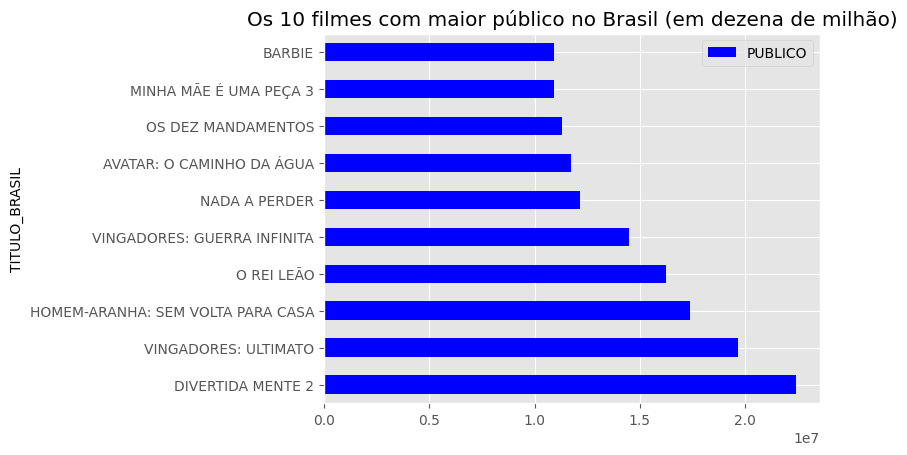

In [249]:
(
    df
    .sort_values(
        "PUBLICO", 
        ascending = False
    )
    .iloc[:10]
    .plot(
        kind = 'barh',
        title = 'Os 10 filmes com maior público no Brasil (em dezena de milhão)',
        x = 'TITULO_BRASIL',
        y =  'PUBLICO',
        color = 'blue'
    )
)

Qual o país com mais obras no conjunto de dados?

<Axes: title={'center': 'Os países com mais títulos lançados no Brasil'}, ylabel='PAIS_OBRA'>

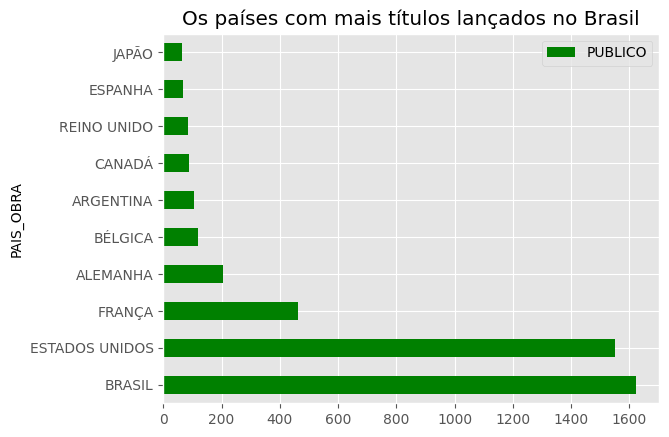

In [250]:
(
    df
    .groupby('PAIS_OBRA')
    .count()
    .sort_values('PUBLICO', ascending = False)
    .iloc[:10]
    .plot(
        kind = 'barh',
        title =  'Os países com mais títulos lançados no Brasil',
        y =  'PUBLICO',
        color = 'green'
    )
) 

Qual a média de público para as obras por país?

<Axes: title={'center': 'Os países com a melhor média de público no Brasil'}, ylabel='PAIS_OBRA'>

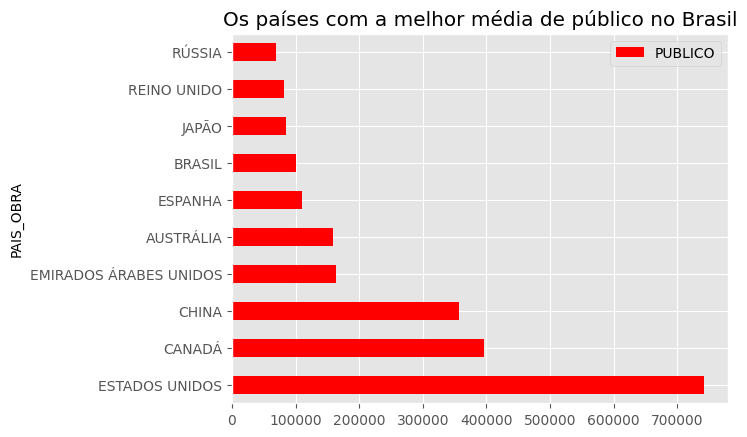

In [251]:
(
    df
    .groupby('PAIS_OBRA')
    .mean()
    .sort_values('PUBLICO', ascending = False)
    .iloc[:10]
    .plot(
        kind = 'barh',
        title = 'Os países com a melhor média de público no Brasil',
        y =  'PUBLICO',
        color = 'red'
    )
) 

Qual a mediana de público para obras brasileiras e não brasileiras?

In [252]:
df_teste = (
    df
    .groupby('PAIS_OBRA')
    .median()
    .sort_values(
        'PUBLICO',
        ascending = False
    )
    .drop(
        columns = 'ANO_LANCAMENTO'
    )
    .reset_index()
)

df_teste[df_teste.get('PAIS_OBRA') == 'BRASIL']

,PAIS_OBRA,PUBLICO
67,BRASIL,1196.5


In [253]:
df_mediana_pais_100 = (
    df
    .groupby('PAIS_OBRA')
    .median()
    .sort_values(
        'PUBLICO',
        ascending = False
    )
    .drop(
        columns = 'ANO_LANCAMENTO'
    )
    .iloc[:100]
)

mediana_br = (
    df_mediana_pais_100
    .loc['BRASIL']
    .get('PUBLICO')
)

mediana_nao_br = (
    df_mediana_pais_100
    .reset_index()[
        df_mediana_pais_100
        .reset_index()
        .get('PAIS_OBRA') != 'BRASIL'
        ]
    .get('PUBLICO')
    .median()
)

print(
    'Mediana de filmes brasileiros: ', mediana_br, '\nMediana de filmes não brasileiros: ',mediana_nao_br
)


Mediana de filmes brasileiros:  1196.5 
Mediana de filmes não brasileiros:  5046.25


Qual ano teve o maior número de lançamentos?

<Axes: title={'center': 'Número de lançamento por ano'}, xlabel='ANO_LANCAMENTO'>

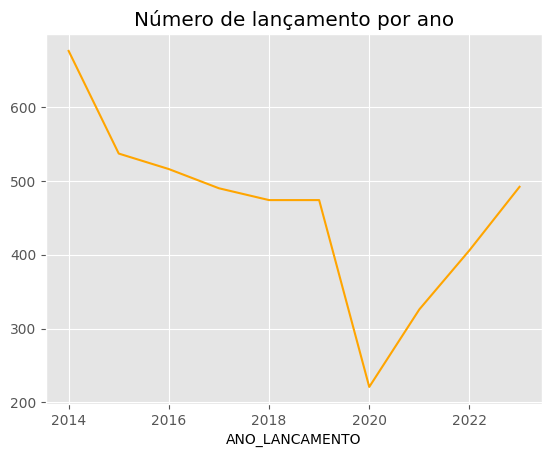

In [254]:
(
    df
    .groupby('ANO_LANCAMENTO')
    .count()
    .iloc[:10]
    .plot(
        kind = 'line',
        title =  'Número de lançamento por ano',
        y =  'PUBLICO',
        color = 'orange',
        legend = False
    )
)

Em qual ano mais pessoas foram ao cinema?

<Axes: title={'center': 'Público dos diversos filmes por ano de lançamento'}, xlabel='PUBLICO', ylabel='ANO_LANCAMENTO'>

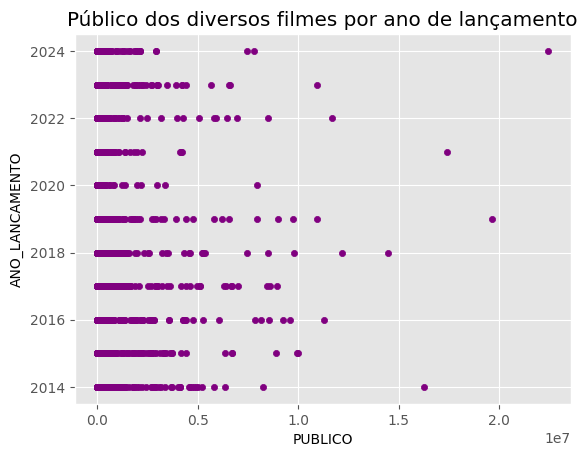

In [255]:
(
    df
    .plot(
        kind = 'scatter',
        y = 'ANO_LANCAMENTO',
        x = 'PUBLICO',
        color = 'purple',
        title = 'Público dos diversos filmes por ano de lançamento'
    )
)

Um outlier é um valor que se distancia significativamente dos demais dados de um conjunto. Ele pode indicar uma variação natural, um erro de medição ou um evento excepcional. Identificar outliers é importante porque eles podem distorcer análises estatísticas, como médias e regressões, influenciando os resultados. Nesse gráfico, conseguimos identificar alguns.

Mas quais são esses outliers? Vamos criar um gráfico interativo

In [256]:
df_interativo_pd = df.to_df()

fig = px.scatter(
    df_interativo_pd,
    x='PUBLICO',
    y='ANO_LANCAMENTO',
    hover_data=['TITULO_ORIGINAL'],  # Mostra o título original ao passar o mouse
    color_discrete_sequence=['purple'],  # Define a cor das bolinhas
    title='Público dos diversos filmes por ano de lançamento'
)

fig.show()


Dos filmes não publicitários brasileiros, quantos foram acordos de co-produção? E qual o tipo de acordo mais comum?


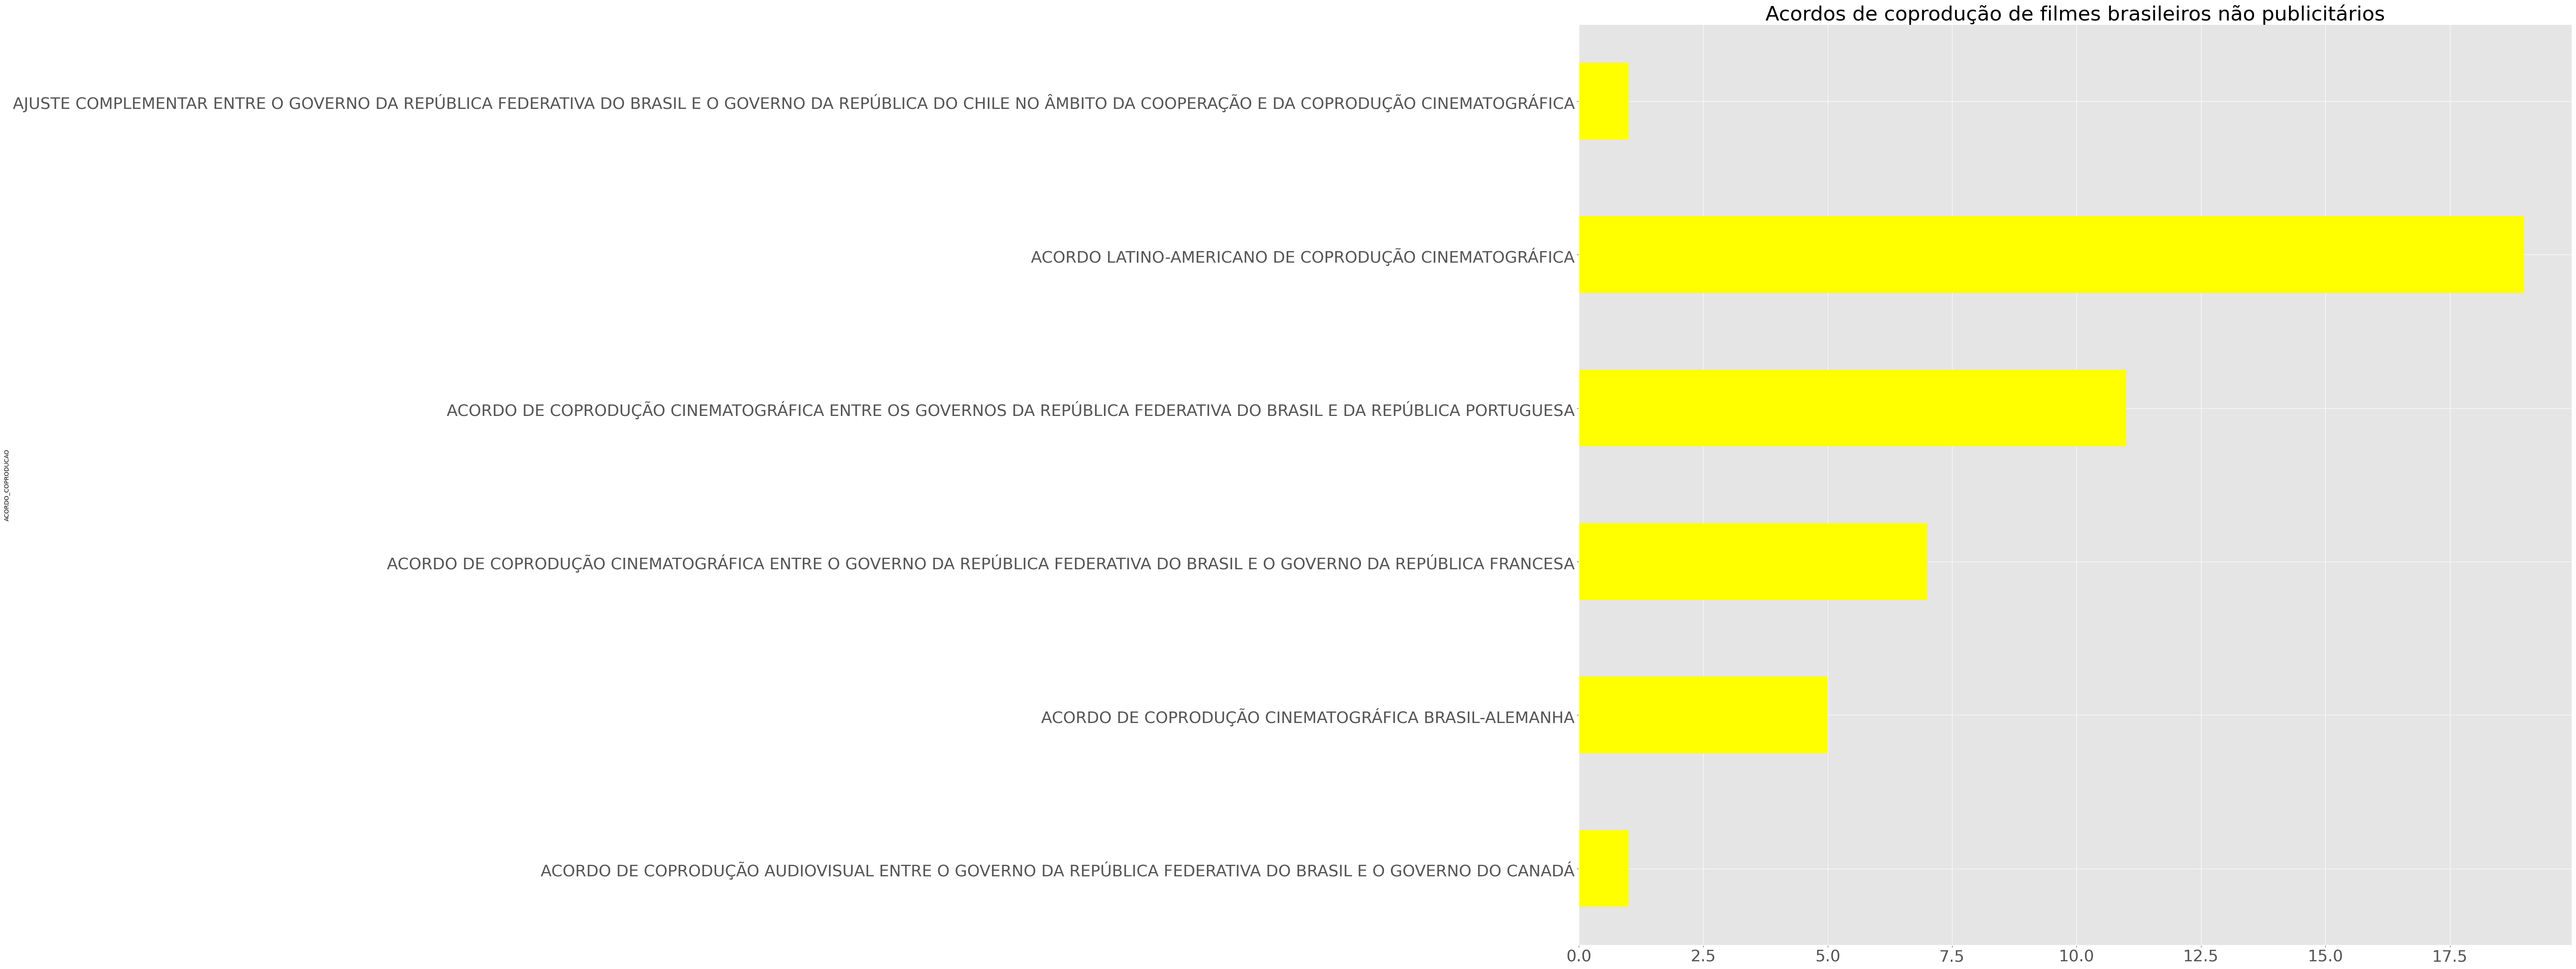

In [257]:
filmes_brasileiros = df[df.get('PAIS_OBRA') == 'BRASIL']
filmes_nao_publicitarios = filmes_brasileiros[filmes_brasileiros.get('OBRA_PUBLICITARIA') == 'NÃO']
filmes_acordo_coproducao = filmes_nao_publicitarios[filmes_nao_publicitarios.get('ACORDO_COPRODUCAO') != 'NÃO SE APLICA']

ax = (
    filmes_acordo_coproducao
    .groupby('ACORDO_COPRODUCAO')
    .count()
    .plot(
        kind = 'barh',
        y = 'PUBLICO',
        figsize = (30,28),
        legend = False,
        color = 'yellow',
        fontsize = 27
    )
)

# Configurando o título com o tamanho correto
ax.set_title(
    'Acordos de coprodução de filmes brasileiros não publicitários',
    fontsize=34
)


plt.show()

Em nossa base de dados, dos 100 filmes com maior público, entre os filmes brasileiros, qual a partição de paticipação brasileira mais comum (majoritária, total ou minoritária)? 

In [258]:
df.columns

Index(['TITULO_ORIGINAL', 'TITULO_BRASIL', 'RAZAO_SOCIAL_DISTRIBUIDORA',
       'PAIS_OBRA', 'PUBLICO', 'PART_PATRIMONIAL_BRASILEIRA',
       'ACORDO_COPRODUCAO', 'OBRA_PUBLICITARIA', 'ANO_LANCAMENTO'],
      dtype='object')

<Axes: title={'center': 'Participação patrimonial brasileira dos filmes brasileiros no top 100'}>

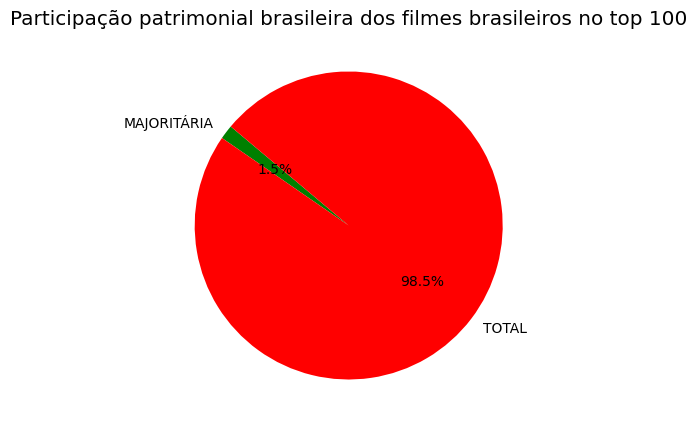

In [259]:
# Filtrando os filmes top 100 brasileiros
filmes_top100 = df.sort_values('PUBLICO').iloc[:100]
filmes_top100_brasileiros = filmes_top100[filmes_top100.get('PAIS_OBRA') == 'BRASIL']

# Contando as ocorrências de cada valor em 'PART_PATRIMONIAL_BRASILEIRA'
# Usamos .groupby() e .size() para contar os elementos
(
    filmes_top100_brasileiros
    .groupby('PART_PATRIMONIAL_BRASILEIRA')
    .size()
    .plot(
        kind='pie',
        title='Participação patrimonial brasileira dos filmes brasileiros no top 100',
        figsize=(5, 5),  
        autopct='%1.1f%%',  
        startangle=140,  
        colors=['green', 'red'],  
        legend=False  
    )
)

## Passo 3: Realizando previsões
- Perguntas preditivas
- Distribuição de probabilidade
- Qual o problema?
- Teste de hipóteses
- Simulação
- Correlação

### Se vou lançar um filme brasileiro, qual será seu público no Brasil?

Para responder à pergunta sobre qual será o público de um filme brasileiro, podemos utilizar a média ou a mediana de públicos de filmes brasileiros de nossa amostra. Para isso, é importante entender alguns conceitos estatísticos que nos ajudarão a tirar conclusões mais robustas:

#### Teorema Central do Limite (TCL): 
Este teorema afirma que, à medida que o tamanho da amostra aumenta, a distribuição das médias das amostras tende a se aproximar de uma distribuição normal, independentemente da distribuição original dos dados. Isso é útil quando queremos estimar a média de uma população a partir de uma amostra, assumindo que nossa amostra é suficientemente grande.

#### Bootstrap: 
O método de bootstrap é uma técnica de reamostragem usada para estimar a distribuição de uma estatística (como a média) a partir de uma amostra existente. Ele cria várias amostras de dados aleatórios com reposição e calcula a estatística de interesse para cada uma, gerando uma distribuição empírica. Isso ajuda a quantificar a incerteza em nossas estimativas.

#### Normalidade: 
A normalidade refere-se à suposição de que os dados seguem uma distribuição normal, ou seja, uma distribuição simétrica em torno de uma média. Essa suposição é importante para muitos testes estatísticos e pode ser verificada visualmente com gráficos, como o histograma, ou por meio de testes formais de normalidade.

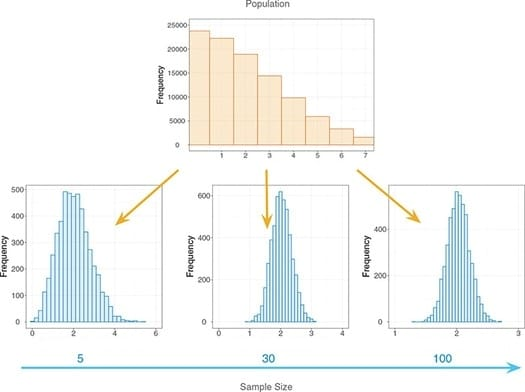

Esses conceitos nos permitirão realizar uma estimativa mais precisa do público para o filme brasileiro, levando em conta as variações e a incerteza nos dados disponíveis.

In [260]:
df_filmes_br = df[df.get('PAIS_OBRA') == 'BRASIL'].drop(columns = 'ANO_LANCAMENTO')



<Axes: title={'center': 'Distribuição da popularidade de filmes brasileiros'}, ylabel='Frequency'>

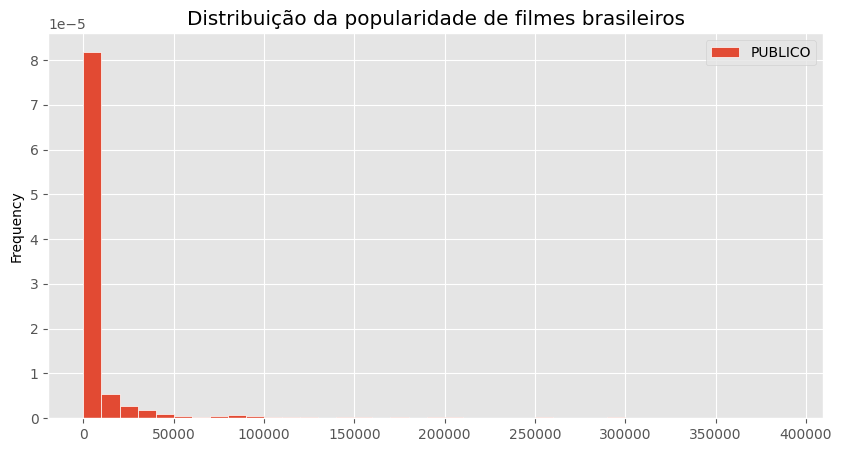

In [261]:
df_filmes_br.plot(
    kind = 'hist',
    bins=np.arange(0, 400000, 10000), 
    density=True, 
    ec='w', 
    figsize=(10, 5),
    title='Distribuição da popularidade de filmes brasileiros'
)

#### Mas, afinal, vamos usar a média ou a mediana para chegar em um valor próximo do que queremos?
Primeiro, vamos lembrar que estamos tratando de uma amostra e, por isso, podemos realizar o boostraping. Aqui, o que acontece é que tentamos calcular uma provável média ou mediana populacional baseado nos dados que temos. 

A escolha entre usar a média ou a mediana em um processo de bootstrap depende das características dos dados e dos objetivos da análise. A média é uma medida de tendência central muito útil em distribuições simétricas e sem outliers, pois ela captura o valor médio de todos os pontos de dados. No entanto, a média é sensível a valores extremos, ou seja, outliers, que podem distorcer a análise, especialmente em distribuições assimétricas.

Por outro lado, a mediana é mais robusta e confiável quando os dados possuem outliers ou uma distribuição assimétrica. Ela representa o valor central dos dados e não é influenciada por valores extremos, tornando-se uma escolha mais segura quando se trabalha com dados que apresentam grande variação, como o público de filmes. Portanto, em contextos onde há valores atípicos, como filmes com públicos extremamente altos ou baixos, a mediana é preferível para uma análise mais precisa e estável.

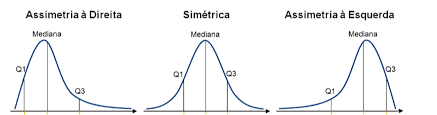

Como temos uma distribuição assimétrica, será melhor utilizarmos a mediana! 

In [262]:
np.random.seed(38)

tamanho = df_filmes_br.shape[0]
amostra = df_filmes_br

n_reamostragens = 5000

boot_medianas = np.array([])

for i in range(n_reamostragens):

    # Reamostragem com reposição
    reamostragem = amostra.sample(tamanho, replace=True)
    
    # Calculo a mediana
    mediana = reamostragem.get('PUBLICO').median()
    
    # Armazeno no array
    boot_medianas = np.append(boot_medianas, mediana)

<Axes: ylabel='Frequency'>

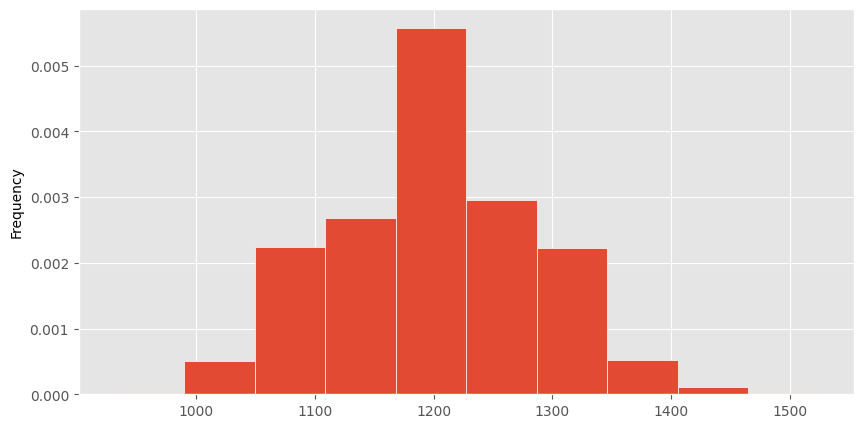

In [263]:
(
    bpd.DataFrame()
    .assign(BootstrapMedians=boot_medianas)
    .plot(
        kind='hist', 
        density=True, 
        ec='w', 
        figsize=(10, 5),
        legend =  False,
        ylabel = 'Frequencia'
    )
)

Como podemos perceber, esse Histograma é centrado na mediana que mais aparece se reamostramos nossa amostra. Assim, essa é a mediana mais provável de nossa população. Ou seja, espera-se que um filme mediano tenha por volta de 1200 de público.

Vamos aprofundar um pouco: Intervalo de confiança

Um intervalo de confiança é uma faixa de valores, calculada a partir de uma amostra, que estima o parâmetro populacional com uma certa confiança. O intervalo de confiança de 95% é o mais comum e significa que, se repetirmos o processo de amostragem muitas vezes, 95% dos intervalos calculados irão conter o valor real do parâmetro. Em outras palavras, há 95% de chance de que o valor real esteja dentro desse intervalo. Quanto menor o intervalo, menor a confiança, ou seja: quanto mais preciso, menos confiável.

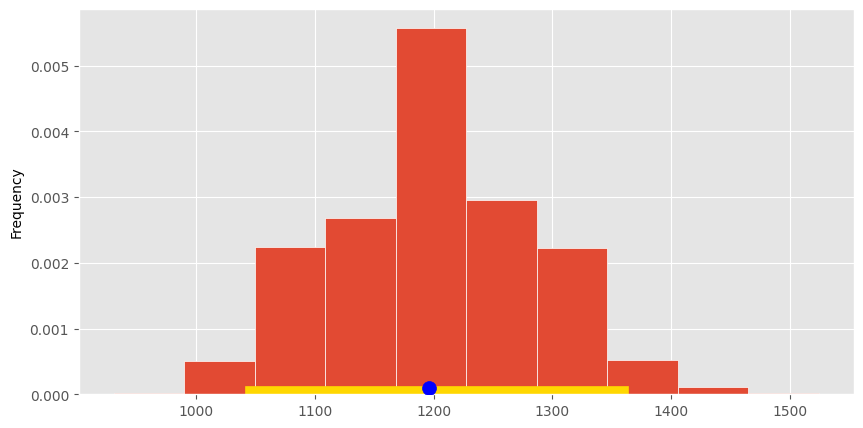

In [264]:
left = np.percentile(boot_medianas, 2.5)
right = np.percentile(boot_medianas, 97.5)
population_median = df_filmes_br.get('PUBLICO').median()

bpd.DataFrame().assign(BootstrapMedians=boot_medianas).plot(kind='hist', density=True,  ec='w', figsize=(10, 5),legend =  False,ylabel = 'Frequencia')

plt.scatter(population_median, 0.00009, color='blue', s=100, zorder=3)
plt.plot([left, right], [0, 0], color='gold', linewidth=12, zorder=2)
plt.show()

Lembrando valores encontrados anteriormente:

Mediana de filmes brasileiros:  1196.5 

Mediana de filmes não brasileiros:  5046.25

Vamos lembrar que a mediana de público para obras não brasileiras é 5046,25 (entre os 100 países de obras com maior público). Além disso, no ranking, o Brasil fica em 67º em mediana. Considerando isso, chegamos ao nosso problema: 
### O povo brasileiro não valoriza sua própria obra
Mostrando nossas análises ao Governo Federal, chegamos em um consenso: é preciso aumentar o público mediano de obras brasileiras em pelo menos 20%. Mas, afinal, como fazer isso?

Solução: Criar um projeto de governo ..., que conte ainda com apoio financeiro para ajudar nos gastos orçamentários da produção.

Curiosidade: O orçamento do filme Ainda Estou Aqui foi de 8 milhões de reais

_______________________________________________________________________



E o tempo passa ...

Agora estamos em 2030

Após testar nossa solução por alguns anos, chegamos a alguns resultados, e precisamos entender o que esses resultados dizem sobre nossa solução. 

In [265]:
df_sol = bpd.read_csv("resultadoProjeto.csv")

In [266]:
df_sol

,TITULO_ORIGINAL,TITULO_BRASIL,RAZAO_SOCIAL_DISTRIBUIDORA,PAIS_OBRA,PUBLICO,PART_PATRIMONIAL_BRASILEIRA,ACORDO_COPRODUCAO,OBRA_PUBLICITARIA,ANO_LANCAMENTO,FINANCIAMENTO_PROJETO
0,LULA: A HISTÓRIA DE UMA LUTA,LULA: A HISTÓRIA DE UMA LUTA,ESFERA PRODUÇÕES CULTURAIS EIRELI,BRASIL,65403,TOTAL,ACORDO LATINO-AMERICANO DE COPRODUÇÃO CINEMATO...,SIM,2030,1019091.77
1,JORNADA PELA LIBERDADE,JORNADA PELA LIBERDADE,SM DISTRIBUIDORA DE FILMES LTDA,BRASIL,71217,TOTAL,NÃO SE APLICA,SIM,2029,1157336.07
2,NOITE EM OLÍMPIA,NOITE EM OLÍMPIA,ESFERA PRODUÇÕES CULTURAIS EIRELI,BRASIL,46498,MAJORITÁRIA,NÃO SE APLICA,SIM,2029,486308.75
3,UM DIA NO RIO,UM DIA NO RIO,CINEBRASIL DISTRIBUIDORA LTDA,BRASIL,40342,MAJORITÁRIA,NÃO SE APLICA,SIM,2025,619494.25
4,NOITE EM OLÍMPIA,NOITE EM OLÍMPIA,VIDEOFILMES PRODUÇÕES ARTÍSTICAS LTDA,BRASIL,52537,MAJORITÁRIA,ACORDO DE COPRODUÇÃO CINEMATOGRÁFICA ENTRE O G...,SIM,2026,661693.56
...,...,...,...,...,...,...,...,...,...,...
95,UM DIA NO RIO,UM DIA NO RIO,SM DISTRIBUIDORA DE FILMES LTDA,BRASIL,73041,MAJORITÁRIA,NÃO SE APLICA,SIM,2027,1080134.31
96,NOITE EM OLÍMPIA,NOITE EM OLÍMPIA,ESFERA PRODUÇÕES CULTURAIS EIRELI,BRASIL,33608,MAJORITÁRIA,NÃO SE APLICA,SIM,2028,385094.61
97,REVOLUÇÃO DOS PALMARES,REVOLUÇÃO DOS PALMARES,CINEBRASIL DISTRIBUIDORA LTDA,BRASIL,45958,MAJORITÁRIA,NÃO SE APLICA,SIM,2029,576475.86
98,LULA: A HISTÓRIA DE UMA LUTA,LULA: A HISTÓRIA DE UMA LUTA,CINEBRASIL DISTRIBUIDORA LTDA,BRASIL,52249,MAJORITÁRIA,NÃO SE APLICA,SIM,2029,691517.70


### Nossa solução é eficaz?

Para entender se a solução adotada foi eficaz em aumentar o público mediano das obras brasileiras, podemos utilizar um teste de hipóteses. O teste de hipóteses nos permite verificar se uma afirmação ou suposição sobre um parâmetro populacional é válida, com base em uma amostra de dados.


Para isso, vamos assumir que os dados observados podem ocorrer ao acaso, por mera coincidência

In [267]:
df_sol.get('PUBLICO').median()

49567.5

#### Teste de hipóteses:
O teste de hipóteses começa com uma hipótese nula (H₀) e uma hipótese alternativa (H₁). A hipótese nula geralmente representa o status quo ou a ideia de que não houve efeito, enquanto a hipótese alternativa sugere que houve uma mudança ou efeito significativo.

Hipótese nula (H₀): A mediana de público das obras brasileiras em 2030 não é 20% maior que a anterior.

Hipótese alternativa (H₁): A mediana de público das obras brasileiras em 2030 é 20% maior do que a anterior.

- ##### O que é o valor-p?

O valor-p é um número que nos ajuda a decidir se devemos rejeitar ou aceitar a hipótese nula. Ele nos diz a probabilidade de obtermos os dados observados (ou algo mais extremo), caso a hipótese nula seja verdadeira. Em termos simples:

    - Valor-p baixo (geralmente abaixo de 0,05): A chance de os dados observados ocorrerem por acaso é muito pequena, ou seja, se ocorreram, tem um motivo. Isso significa que a hipótese nula provavelmente está errada, e há evidências suficientes para rejeitar a hipótese nula.

    - Valor-p alto (geralmente acima de 0,05): A chance de os dados observados ocorrerem por acaso é maior. Isso significa que não temos evidências suficientes para rejeitar a hipótese nula. 

O valor base para o p-valor (0,05) é chamado de nível de significância
    
Um dos principais componentes de um teste de hipóteses é o valor-p. O valor-p indica a probabilidade de observar os dados coletados, ou algo mais extremo, assumindo que a hipótese nula seja verdadeira. Se o valor-p for pequeno (geralmente menor que 0,05), isso sugere que a hipótese nula pode ser rejeitada, indicando que a solução adotada foi eficaz em aumentar o público. 

Por exemplo, se obtivermos um valor-p de 0,03, isso significa que há apenas 3% de chance de observarmos os dados que coletamos, assumindo que não houve aumento no público. Como o valor-p é menor que 0,05, podemos rejeitar a hipótese nula e concluir que houve um aumento significativo no público das obras brasileiras.

In [268]:
# Configurações do teste
mediana_anterior = 1196.5 
mediana_esperada = mediana_anterior * 1.2  
significancia = 0.05  

# Extrair a coluna de público da base mais recente
publico_atual = df_sol.get('PUBLICO')

In [269]:
# Booststrapping
np.random.seed(38)
tamanho = df_sol.shape[0] 
amostra = df_sol
n_reamostragens = 5000

boot_medianas = np.array([])

for i in range(n_reamostragens):
    reamostragem = amostra.sample(tamanho, replace=True)

    mediana = reamostragem.get('PUBLICO').median()

    boot_medianas = np.append(boot_medianas, mediana)


In [270]:
# Calcular o p-valor (proporção de medianas abaixo do esperado)
p_valor = np.mean(boot_medianas < mediana_esperada)

# Conclusão do teste
if p_valor < significancia:
    print(f"Rejeitamos a hipótese nula (H₀). O valor p é {p_valor:.4f}.")
    print("A mediana de público é significativamente maior que 20% da anterior.")
else:
    print(f"Não rejeitamos a hipótese nula (H₀). O valor p é {p_valor:.4f}.")
    print("Não há evidências suficientes para afirmar que a mediana de público é 20% maior.")

Rejeitamos a hipótese nula (H₀). O valor p é 0.0000.
A mediana de público é significativamente maior que 20% da anterior.


A nossa solução funciona!

### Se o projeto investir 1 milhão reais em um projeto cinematográfico brasileiro, qual será seu público?

Para responder a essa pergunta, podemos usar duas ferramentas estatísticas fundamentais: correlação e regressão.

#### Correlação:
A correlação ajuda a entender se há uma relação entre o valor investido em um filme e o público que ele atrai. No seu contexto, a correlação poderia nos mostrar, por exemplo, se existe uma associação entre o fomento financeiro e o público do filme. Uma correlação positiva indicaria que, à medida que o fomento financeiro aumenta, o público também tende a aumentar. Já uma correlação negativa indicaria que mais dinheiro não necessariamente leva a um maior público.

    - Por exemplo, ao calcular a correlação entre o valor de fomento e o público de filmes anteriores, você pode identificar se, historicamente, filmes com maior investimento financeiro atraem mais espectadores. Se a correlação for forte e positiva, isso sugeriria que o valor investido está, de fato, relacionado ao aumento do público.

#### Regressão:
Já a regressão vai além, permitindo-nos prever o público de um filme com base em variáveis como o fomento financeiro, distribuidora, ano de lançamento, entre outras. Com um modelo de regressão, você pode criar uma equação que estime o público esperado para um filme dado um valor específico de fomento financeiro. A regressão nos ajuda a entender não apenas se o fomento financeiro afeta o público, mas quanto ele afeta, fornecendo uma estimativa mais precisa.

    - Por exemplo, se um modelo de regressão linear for ajustado usando o valor de fomento e o público de filmes passados, você poderá calcular a  previsão do público de um novo filme, dado o valor do investimento. Isso ajudará a determinar se o fomento de X reais resultará em um público maior ou menor, baseado nos dados históricos.

In [271]:
# Selecionar as colunas relevantes
publico = df_sol.get('PUBLICO')
financiamento = df_sol.get('FINANCIAMENTO_PROJETO')

In [272]:
# Verificar correlação (cálculo manual)
media_publico = publico.mean()
media_financiamento = financiamento.mean()

numerador = ((publico - media_publico) * (financiamento - media_financiamento)).sum()
denominador = np.sqrt(((publico - media_publico)**2).sum() * ((financiamento - media_financiamento)**2).sum())
correlacao = numerador / denominador

print(f"Correlação: {correlacao:.4f}")

Correlação: 0.8891


In [273]:
# Regressão linear (cálculo manual)
coef_angular = numerador / ((financiamento - media_financiamento)**2).sum()
coef_linear = media_publico - coef_angular * media_financiamento
print(f"Equação da regressão: y = {coef_angular:.4f}x + {coef_linear:.4f}")

Equação da regressão: y = 0.0480x + 16294.6114


#### O que está acontecendo ?!
Correlação:
A correlação mede como duas variáveis se relacionam. O cálculo verifica se os valores aumentam ou diminuem juntos. A fórmula usa o desvio de cada valor em relação à média (desvio padrão), dividindo pelo produto das variações (numerador/denominador). Valores variam entre -1 (relação negativa forte), 0 (sem relação) e 1 (relação positiva forte).

Regressão:
A regressão ajusta uma reta que melhor explica a relação entre duas variáveis. Calculamos o “coeficiente angular” (inclinação) para cada unidade de mudança e o “coeficiente linear” (interseção com o eixo Y). A fórmula final mostra como prever um valor com base no outro.

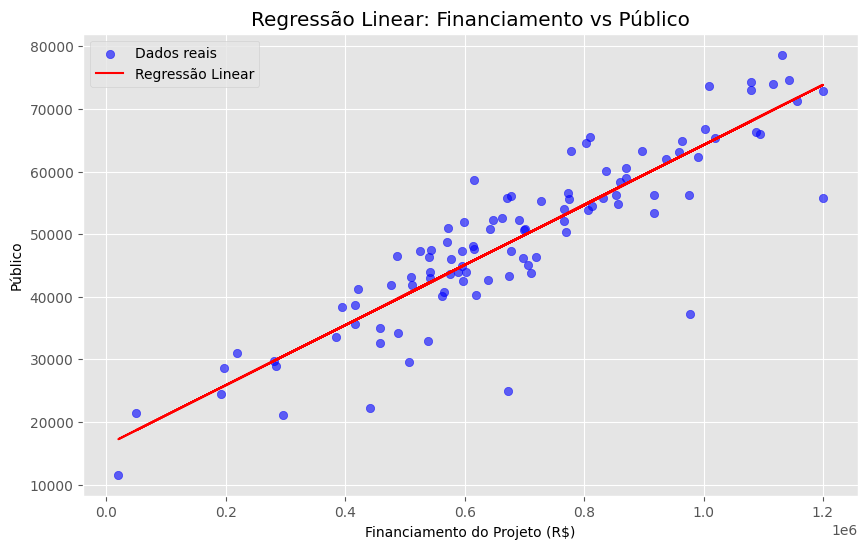

In [274]:
# Plotar o gráfico de regressão
plt.figure(figsize=(10, 6))
plt.scatter(financiamento, publico, color='blue', label='Dados reais', alpha=0.6)
plt.plot(financiamento, coef_angular * financiamento + coef_linear, color='red', label='Regressão Linear')
plt.xlabel('Financiamento do Projeto (R$)')
plt.ylabel('Público')
plt.title('Regressão Linear: Financiamento vs Público')
plt.legend()
plt.grid(True)
plt.show()

In [275]:
# Previsão para financiamento de 1 milhão de reais
financiamento_1_milhao = 1_000_000
publico_estimado = coef_angular * financiamento_1_milhao + coef_linear
print(f"Estimativa de público para R$ 1 milhão de financiamento: {publico_estimado:.2f}")

Estimativa de público para R$ 1 milhão de financiamento: 64250.30


Pronto, esse é um resumo do que um cientista de dados faz: limpamos dados (por MUITO tempo), analisamos dados e tentamos prever dados. Podemos aplicar nossos conhecimentos nas mais diversas áreas, pois em qualquer lugar, temos acesso a dados!

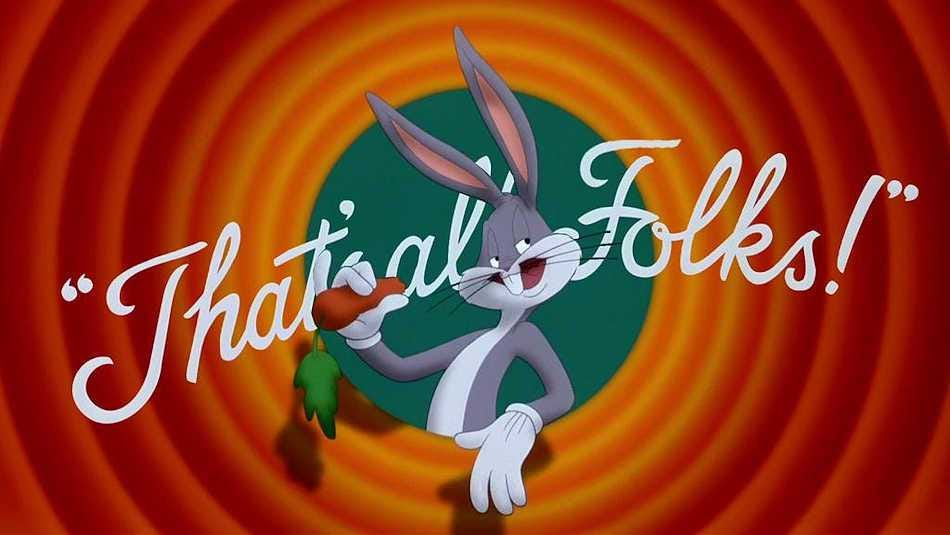